<a href="https://colab.research.google.com/github/Yhadiii26/sesgos/blob/main/sesgos_en_noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# esto me compartio Albornoz
!pip install gensim

import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [75]:
import pandas as pd
df = pd.read_csv("df_total.csv")



In [76]:
df.head(15)

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
5,https://www.larepublica.co/redirect/post/3225281,El emprendimiento del sector inmobiliario Rent...,Alianzas
6,https://www.bbva.com/es/mx/mexico-y-el-desafio...,El país tiene pendiente generar más y mejores ...,Macroeconomia
7,https://www.bbva.com/es/podcast-agile-en-la-un...,En el 'podcast' tenemos el placer de entrevist...,Innovacion
8,https://www.bbva.com/es/la-ingenieria-social-e...,"El factor humano, normalmente identificado com...",Innovacion
9,https://www.bbva.com/es/que-hace-un-developer-...,Los perfiles que se demandan en un banco han e...,Innovacion


In [77]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1217 non-null   object
 1   news    1217 non-null   object
 2   Type    1217 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB


(1217, 3)

In [78]:
corpus = df['news'].tolist()

In [79]:
 #sirve para tomar un conjunto de textos y transformarlos en una lista de listas de palabras, cada palabra está en minúsculas.
 sentences = [frase.lower().split() for frase in corpus]

print(sentences[0])

['durante', 'el', 'foro', 'la', 'banca', 'articulador', 'empresarial', 'para', 'el', 'desarrollo', 'sostenible', 'el', 'director', 'de', 'sostenibilidad', 'y', 'clientes', 'globales', 'de', 'bbva', 'en', 'colombia', 'andrés', 'garcía', 'aseguró', 'que', 'es', 'importante', 'entender', 'que', 'la', 'sostenibilidad', 'no', 'la', 'podemos', 'asociar', 'a', 'mayores', 'costos.', 'yo', 'creo', 'que', 'el', 'no', 'tener', 'un', 'concepto', 'de', 'negocio', 'sostenible', 'puede', 'tener', 'un', 'mayor', 'impacto', 'de', 'lo', 'que', 'imaginamos.para', 'garcía', 'el', 'reto', 'más', 'importante', 'es', 'no', 'cambiar', 'prioridades', 'ni', 'que', 'compitan', 'entre', 'sí', 'necesariamente.', 'en', 'muchos', 'de', 'los', 'casos', 'se', 'debe', 'tratar', 'de', 'mantener', 'la', 'prioridad', 'en', 'cuanto', 'a', 'la', 'ambición', 'de', 'negocios', 'más', 'sostenibles', 'un', 'reto', 'enorme', 'por', 'la', 'coyuntura.', 'la', 'sostenibilidad', 'nos', 'abre', 'oportunidades', 'a', 'mejores', 'fuent

In [80]:
model = Word2Vec(sentences,vector_size=50,window=3,min_count=1,workers=4,sg=1)

print(model.wv["modelo"])
print(len(model.wv["modelo"]))

[ 0.1475279  -0.25412065 -0.17289892  0.06790579 -0.7678485  -0.01775777
  0.3857058  -0.018219   -0.41530567 -0.14505032  0.18543264 -0.16628025
  0.38052267  0.12682134 -0.11464877  0.4875133   0.9898509  -0.1570143
 -1.0139291  -0.7024857   0.78492695  0.03464912  1.1351651   0.0023261
 -0.09222808  0.01709397 -0.02468699  0.24041691 -0.66373026  0.1944845
  0.5764846  -0.6684513   0.55305856  0.08824209 -0.15303227 -0.15156743
  0.70297647 -0.00381674  0.32800204 -0.1504683   0.27480856  0.2953086
 -0.60699916 -0.1064991   0.39409867  0.34091374 -0.06574444 -0.58956033
  0.30672866  0.45270413]
50


In [81]:
palabras= ["mujer","hombre","indigente","extranjero","becario","joven","mesero","adulto", "niño","adinerado","trabajador","emprendedora","comersiante","desempleado"]

palabrascorr= [p for p in palabras if p in model.wv]
print("Estas palabras van a ser graFICADAS:", palabrascorr)

Estas palabras van a ser graFICADAS: ['mujer', 'hombre', 'extranjero', 'joven', 'adulto', 'niño', 'trabajador', 'emprendedora']


In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



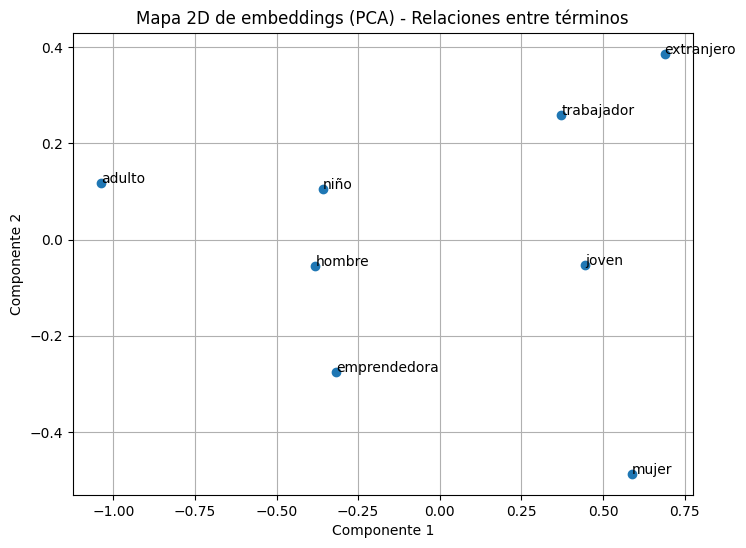

In [73]:

vectores = [model.wv[p] for p in palabrascorr]

pca = PCA(n_components=2)
coords_2d = pca.fit_transform(vectores)

plt.figure(figsize=(8,6))

x_vals = coords_2d[:, 0]
y_vals = coords_2d[:, 1]

plt.scatter(x_vals, y_vals)

for i, palabra in enumerate(palabrascorr):
    plt.annotate(palabra, (x_vals[i], y_vals[i]))
#con ayuda:
plt.title("Mapa 2D de embeddings (PCA) - Relaciones entre términos")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()